In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import random
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision
import os
from random import *

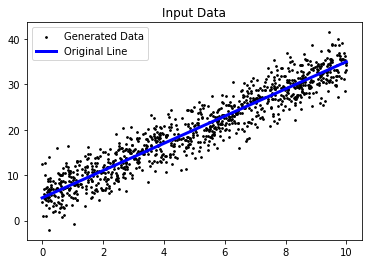

In [15]:


def get_y(t0,t1,x) :
    return t0 + t1*x


# Choose variables
m = 1000 # num of dataset
theta0 = 5.0 #b | y = ax + b
theta1 = 3.0 #a  | y = ax + b

standard_deviation = 3 # Standard_deviation

# Get noise value
noise_generator = torch.distributions.Normal(torch.tensor([0.0]),standard_deviation)


# Generate X, Y values
train_x = []
train_y = []
train_set = []

for i in range(0,m) :
    # Get Random x Values
    x = random() * 10 
    
    noise = noise_generator.sample((1,))
    
    # Get Y value with some noise
    y = get_y(theta0,theta1,x) + noise.item()
    
    # Append to data list
    train_x.append([x])
    train_y.append([y])
    train_set.append([i,y])



# Variables for plot line
train_x_min = min(train_x)[0]
train_x_max = max(train_x)[0]


plot1 = plt.scatter(train_x,train_y, color='black',marker='o',s=3)
plot2, = plt.plot([train_x_min,train_x_max],[get_y(theta0,theta1,train_x_min),get_y(theta0,theta1,train_x_max)], color='blue',linewidth=3)
plot2.LineWidth=10

plt.title("Input Data") 
plt.legend([plot1,plot2],["Generated Data","Original Line"])
plt.show()

In [17]:

# Type Initialize thetas for using torch lib.
train_x = torch.FloatTensor(train_x)
train_y = torch.FloatTensor(train_y)
train_set = torch.FloatTensor(train_set)


# Initialize thetas for hypothesis
hth0 = torch.FloatTensor([1.0])
hth1 = torch.FloatTensor([1.0])

# Setting Step-size. (Learning-rate)
lr = 0.0001


# Setting converge value
loss_conv = 1e-7 # loss converge standard

# Lists for logging
loss_log = []
hth0_log = []
hth1_log = []
epoch_log = []
conv_count = 0 # Variable To count converge
epoch = 0 # Inital epoch value

while (True) :
    epoch +=1
    epoch_log.append(epoch)
    
    # Get y hat value
    yh = hth0 + hth1*train_x
    
    # Get Energy(Loss) value 
    loss = (1/(2*m)) * torch.sum((yh - train_y)**2)
    
    # Logging Status
    loss_log.append(loss)
    hth0_log.append(hth0)
    hth1_log.append(hth1)
    
    # Updating Parameters - Gradient Descent
    hth0 = hth0 - lr * (1/m) * torch.sum((yh-train_y))
    hth1 = hth1 - lr * (1/m) * torch.sum((yh-train_y)*train_x)
    
    # Check Loss value converge
    if len(loss_log) > 2 :
        if abs(loss_log[-1] - loss_log[-2]) < loss_conv :
            conv_count += 1
        else :
            conv_count = 0
            
    if conv_count > 3 :
        print("Loss is converged")
        print("epoch {}, theta0 {:.5f}, theta1 {:.5f}, loss {:.10f}".format(epoch,hth0.item(),hth1.item(),loss_log[-1]))
                                                         
        break



Loss is converged
epoch 111604, theta0 5.00000, theta1 2.98658, loss 4.4200744629


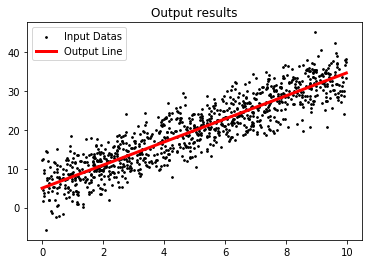

In [91]:
# Output results
plot1 = plt.scatter(train_x,train_y, color='black',marker='o',s=3)
plot2, = plt.plot([train_x_min,train_x_max],[get_y(hth0,hth1,train_x_min),get_y(hth0,hth1,train_x_max)], color='red',linewidth=3)
plot2.LineWidth=10

plt.title("Output results") 
plt.legend([plot1,plot2],["Input Datas","Output Line"])
plt.show()

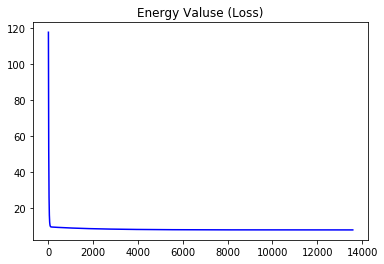

In [92]:
# Plotting the energy values

plot1 = plt.plot(epoch_log,loss_log, color='blue',label='Energy Values')
plt.title("Energy Valuse (Loss)")
plt.show()

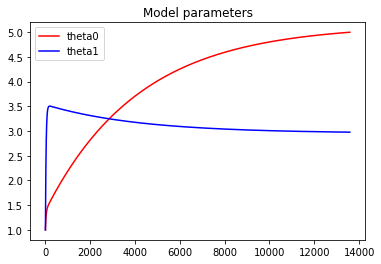

In [93]:
# Plotting the model parameters

plot1, = plt.plot(epoch_log,hth0_log, color='red',label='h-theta0')
plot2, = plt.plot(epoch_log,hth1_log, color= 'blue',label='h-theth1')
plt.title("Model parameters")
plt.legend([plot1,plot2],['theta0','theta1'])
plt.show()